In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# 統計モデル

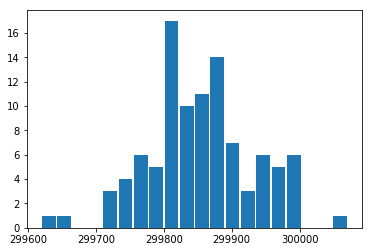

In [2]:
dat = pd.read_csv('data/morley.csv').values.ravel()  # データ読み込みee
plt.hist(dat, bins=20, rwidth=0.9)              # プロット
plt.show()

# 最尤推定量の計算法

In [3]:
x = np.random.uniform(size=10)  # データ数 10
np.max(x)                       # 最尤推定

0.89672167069695474

In [4]:
x = np.random.uniform(size=100) # データ数 100
np.max(x)                       # 最尤推定

0.99837047212661578

In [5]:
n = 10                                # データ数
x = np.random.uniform(size=n)         # データ生成
((n+1)/n) * np.max(x)                 # 不偏推定量

0.53644018864313159

In [6]:
X = np.random.rand(100,n)             # 100セットのデータを生成
X.shape

(100, 10)

In [7]:
# 最尤推定の平均値
# np.amaxで行列Xの各行(axis=1)にmaxを適用．それらの平均値を求める．
np.mean(np.amax(X,axis=1)) 

0.89958718667796544

In [8]:
# 不偏推定の平均値
np.mean((n+1)/n * np.amax(X,axis=1))

0.98954590534576203

In [9]:
df = pd.DataFrame(X)     # データフレームを作る

In [10]:
np.mean(df.apply(np.max, axis=1))                     # 最尤推定の平均値

0.899587186677965

In [11]:
np.mean(df.apply(lambda x:(n+1)/n*np.max(x), axis=1)) # 不偏推定の平均値

0.9895459053457618

In [12]:
# 表現型から遺伝子型の比率を推定
from common import bloodtype as bt
n = np.array([40,30,10,20])     # 例．A:40人，B:30人，AB:10人，O: 20人
bt.mle(n)                       # 最尤推定値の計算

Optimization terminated successfully.
         Current function value: 128.937985
         Iterations: 29
         Function evaluations: 55


array([ 0.29787785,  0.22930651,  0.47281564])

# 混合モデルとEMアルゴリズム

In [13]:
# EMmixBernoulli 関数を読込み
from common.statmodelEMalg import EMmixBernoulli
a = pd.read_csv('data/optdigits_train.csv')     # データ読込み
x = a.values[:,0:64]>8   # 16段階調の8以下を0とし，9以上を1に変換
x.shape                  # 3823サンプル64次元データ

(3822, 64)

In [14]:
y = a.values[:,64]       # 各画像データのラベル．混合モデルの推定には使わない
# 混合ベルヌーイ分布でデータの分布を推定
em = EMmixBernoulli(K=10)   # コンポーネント数は10
em.fit(x)                    # EMアルゴリズムでパラメータ推定
ec = em.predict(x)

In [15]:
# 第1コンポーネント(インデックスは0)に属すデータのラベルを表示
u,c = np.unique(y[ec==0], return_counts=True)
np.c_[u,c].T

array([[  1,   2,   8],
       [ 17, 338,   2]])

In [16]:
# 第3コンポーネント(インデックスは2)に属すデータのラベルを表示 
u,c = np.unique(y[ec==2], return_counts=True)
np.c_[u,c].T

array([[  0,   1,   4,   5,   6],
       [  1,   1, 256,   1,   1]])

In [18]:
# コンポーネント数5で推定
em.K = 5
ec = em.predict(x)
# 第3コンポーネントに属すデータのラベルを表示 
u,c = np.unique(y[ec==2], return_counts=True)
np.c_[u,c].T

array([[  0,   1,   4,   5,   6],
       [  1,   1, 256,   1,   1]])

In [19]:
em.BIC

75748.489650922435

In [20]:
# コンポーネント数の候補
eml = EMmixBernoulli()
Klist = np.arange(4,51)
BIClist = np.array([])
for K in Klist:
    if K%10==0:  #途中経過表示
        print('K=',K)
    eml.K = K          # コンポーネント数設定
    eml.fit(x)          # EMアルゴリズムでパラメータ推定
    BIClist = np.append(BIClist, eml.BIC)

K= 10
K= 20
K= 30
K= 40
K= 50


In [23]:
Klist[np.argmin(BIClist)]  # BICが最小のコンポーネント数

25

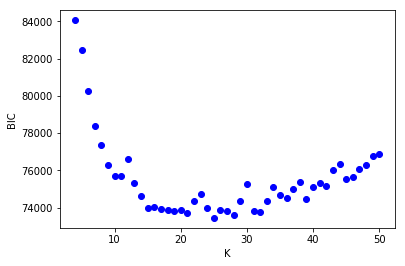

In [24]:
# プロット
plt.xlabel("K")
plt.ylabel("BIC")    
plt.plot(Klist,BIClist,'o',c='b')
plt.show()